# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Francisco Guadarrama  
**Date:** 9/11/2025 
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [1]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/assignment-2-version3-zfrank33/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [2]:
# Import the messy sales dataset
messy_sales <- read_csv("/workspaces/assignment-2-version3-zfrank33/data/messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print("Column names:", paste(names(messy_sales), collapse = ", "))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"


Warning message in print.default("Column names:", paste(names(messy_sales), collapse = ", ")):
“NAs introduced by coercion”


ERROR: Error in print.default("Column names:", paste(names(messy_sales), collapse = ", ")): invalid printing digits -2147483648


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [ ]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


In [ ]:
# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATA STRUCTURE ==="
spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

In [ ]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

1. **Missing Values:** Customer_Name has NA's, Sales_Amount has 22 NA's and Purchase_Date has 14 NA's. 

2. **Potential Outliers:** The -$100 and the $100,0009 in column Sales_Amount and the -1.00 and max of 100 in the Quantity columns are potential outliers.

3. **Data Inconsistencies:** The Product_Category column contains inconsistent capitalization (Electronics vs electronics).

4. **Data Types:** Purchase_Date is using appropriate data types but contains NA's and that will affect time-based analysis. Sales_Amount is using appropriate data types but also contains NA's.

5. **Invalid Values:** It is hard to buy a -1.00 amount of most things unless it's a return (which I assume it is).

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [ ]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"


# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8            41 NA            ELECTRONICS              789. 2023-11-04   
 9            43 Bob Johnson   ELECTRONICS               NA  2023-12-28   
10            45 Jane Doe      electronics               NA  2023-01-08   
# ℹ 34 more rows
# ℹ 1 more variable: Quantity <dbl>


In [ ]:
"#### 2.2 Missing Value Treatment - Option A (Removal)"

# Create a dataset with all missing value rows removed and compare the results.


# 1) Create a cleaned dataset with all rows containing any NA removed
messy_sales_complete <- messy_sales[complete.cases(messy_sales), ]

# 2) Compare row counts
original_rows <- nrow(messy_sales)
complete_rows <- nrow(messy_sales_complete)
removed_rows <- original_rows - complete_rows
removed_pct <- round(100 * removed_rows / original_rows, 2)

comparison_counts <- list(
  original_rows = original_rows,
  complete_rows = complete_rows,
  removed_rows = removed_rows,
  removed_pct = removed_pct
)

# 3) Compare missingness (should be zero in the cleaned set)
missing_per_column_original <- colSums(is.na(messy_sales))
missing_per_column_complete <- colSums(is.na(messy_sales_complete))

# 4) Optional: quick summary comparison for key fields
summary_original <- summary(messy_sales[, c("Sales_Amount", "Quantity")])
summary_complete <- summary(messy_sales_complete[, c("Sales_Amount", "Quantity")])

# Print results
comparison_counts
missing_per_column_original
missing_per_column_complete
summary_original
summary_complete

[1] "#### 2.2 Missing Value Treatment - Option A (Removal)"

$original_rows
[1] 200

$complete_rows
[1] 156

$removed_rows
[1] 44

$removed_pct
[1] 22

TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0

TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0                0 
   Purchase_Date         Quantity 
               0                0

  Sales_Amount         Quantity     
 Min.   :  -100.0   Min.   : -1.00  
 1st Qu.:   362.6   1st Qu.:  2.00  
 Median :   531.3   Median :  5.00  
 Mean   :  1614.9   Mean   : 12.52  
 3rd Qu.:   694.5   3rd Qu.:  8.00  
 Max.   :100000.0   Max.   :100.00  
 NA's   :22                         

  Sales_Amount          Quantity     
 Min.   :   -56.72   Min.   : -1.00  
 1st Qu.:   361.79   1st Qu.:  2.00  
 Median :   537.48   Median :  5.00  
 Mean   :  1729.00   Mean   : 13.59  
 3rd Qu.:   715.74   3rd Qu.:  8.25  
 Max.   :100000.00   Max.   :100.00  

In [ ]:
# TODO: Remove all rows with missing values
sales_removed_na <- messy_sales[complete.cases(messy_sales), ]

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [3]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [4]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  v <- v[!is.na(v)]
  if (length(v) == 0) return(NA)
  u <- unique(v)
  u[which.max(tabulate(match(v, u)))]
}

In [5]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- # YOUR CODE HERE

# Compute the mode of non-missing Customer_Name
name_mode <- get_mode(sales_imputed$Customer_Name)

# Impute only where Customer_Name is NA
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- name_mode

In [6]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- # YOUR CODE HERE

#excluding NA's
qty_median <- median(sales_imputed$Quantity, na.rm = TRUE)

# Impute only where Quantity is NA
sales_imputed$Quantity[is.na(sales_imputed$Quantity)] <- qty_median

In [7]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [ ]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [ ]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [8]:
print("=== AFTER IMPUTATION ===")
#excluding NA's
qty_median_Sales_Amount <- median(sales_imputed$Sales_Amount, na.rm = TRUE)

# Impute only where Sales_Amount is NA
sales_imputed$Sales_Amount[is.na(sales_imputed$Sales_Amount)] <- qty_median_Sales_Amount
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -100.0    388.7    531.3   1495.7    676.6 100000.0 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

For analyses that depend on accurate monetary totals or pricing, drop rows with missing Sales_Amount and treat negative Sales_Amount as returns with a flag. Sales_Amount has strong skew and extreme outliers (max 100,000). Median imputation on numeric fields can distort distributions less than mean imputation, but for a key target like Sales_Amount, any imputation can bias totals and variance. Removing observations with missing Sales_Amount is usually safer for revenue analyses, especially with only 22 NAs out of 200 (11% loss). Do not impute Sales_Amount. 

Quantity has plausible central tendency; median imputation is reasonable if Quantity NAs are few and approximately missing at random.

2. **What are the trade-offs between removal and imputation?**

Complete-case removal keeps only observed data without making model-based assumptions and is simple to implement and interpret, but it reduces sample size (about 11% here), which lowers statistical power, and can introduce bias if the data are not missing completely at random (the shift in mean suggests they aren’t). Imputation, on the other hand, preserves sample size and power and, for variables like Quantity or categorical fields, median or mode imputation is simple and often acceptable; however, it can bias distributions toward the center by shrinking variance, may distort totals, relationships, and inference if applied to key targets like Sales_Amount, and single imputation understates uncertainty, yielding overly optimistic standard errors.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [ ]:
"#### 3.1 Outlier Detection Using IQR Method"

#Apply the interquartile range method to identify outliers in Sales_Amount.

q1 <- quantile(messy_sales$Sales_Amount, 0.25, na.rm = TRUE)
q3 <- quantile(messy_sales$Sales_Amount, 0.75, na.rm = TRUE)
iqr_val <- IQR(messy_sales$Sales_Amount, na.rm = TRUE)

# IQR fences
lower_fence <- q1 - 1.5 * iqr_val
upper_fence <- q3 + 1.5 * iqr_val

# Logical vector indicating outliers
is_outlier <- with(messy_sales,
                   !is.na(Sales_Amount) &
                   (Sales_Amount < lower_fence | Sales_Amount > upper_fence))

# Add an outlier flag to the data
sales_with_outlier_flag <- transform(messy_sales, Sales_Outlier = is_outlier)

# Extract only the outlier rows (optional)
sales_outliers <- messy_sales[is_outlier, ]

# Quick summary of results
list(
  Q1 = q1,
  Q3 = q3,
  IQR = iqr_val,
  lower_fence = lower_fence,
  upper_fence = upper_fence,
  n_outliers = sum(is_outlier, na.rm = TRUE)
)

[1] "#### 3.1 Outlier Detection Using IQR Method"

$Q1
     25% 
362.5782 

$Q3
     75% 
694.4792 

$IQR
[1] 331.9011

$lower_fence
      25% 
-135.2734 

$upper_fence
     75% 
1192.331 

$n_outliers
[1] 6

In [9]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

In [10]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [11]:
### TODO: Identify outliers
outliers <- # YOUR CODE HERE

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 388.682614133283"
[1] "Q3: 676.620099081539"
[1] "IQR: 287.937484948256"
[1] "Lower threshold: -43.2236132891001"
[1] "Upper threshold: 1108.52632650392"
[1] "Number of outliers found: "
[1] "Outlier rows:"
[1] "Q1: 388.682614133283"


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

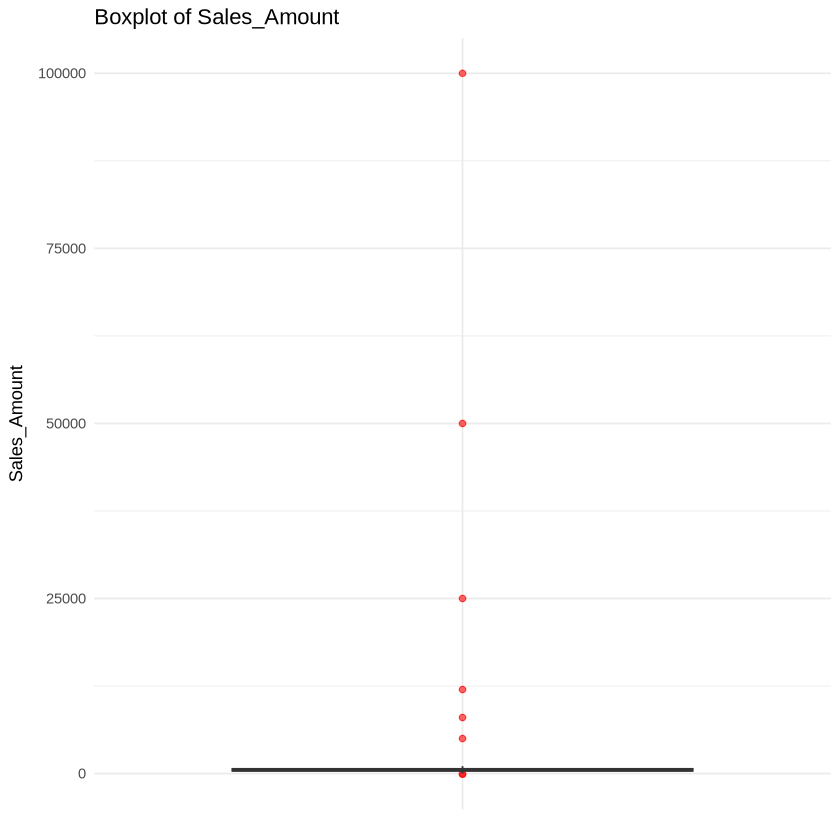

In [12]:
library(ggplot2)

# Overall boxplot of Sales_Amount (outliers shown as red points)
boxplot_sales <- ggplot(sales_imputed, aes(x = "", y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.alpha = 0.6) +
  labs(title = "Boxplot of Sales_Amount", x = NULL, y = "Sales_Amount") +
  theme_minimal()

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [14]:
numeric_cols <- sapply(sales_imputed, is.numeric)
z_scores <- scale(sales_imputed[, numeric_cols, drop = FALSE])
row_is_outlier <- apply(abs(z_scores) > 3, 1, any)

sales_outliers_removed <- sales_imputed[!row_is_outlier, ]

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 198"
[1] "Rows removed: 2"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

In [16]:
# Identify numeric columns
numeric_cols <- sapply(sales_imputed, is.numeric)
num_df <- sales_imputed[, numeric_cols, drop = FALSE]

# IQR caps with names preserved
iqr_caps <- lapply(num_df, function(x) {
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  c(lower = q1 - 1.5 * iqr, upper = q3 + 1.5 * iqr)
})

lower_caps <- sapply(iqr_caps, `[[`, "lower")
upper_caps <- sapply(iqr_caps, `[[`, "upper")

# Apply capping by column position (avoids name mismatches)
num_df_capped <- as.data.frame(mapply(function(col, low, high) {
  pmin(pmax(col, low), high)
}, num_df, lower_caps, upper_caps, SIMPLIFY = FALSE))

# Put back
sales_capped <- sales_imputed
sales_capped[, numeric_cols] <- num_df_capped

# Caps summary indexed by position to avoid name issues
caps_summary <- mapply(function(col, low, high) {
  sum(col < low | col > high, na.rm = TRUE)
}, num_df, lower_caps, upper_caps)

names(caps_summary) <- names(num_df)

print("Number of capped values per numeric column:")
print(caps_summary)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After capping (winsorization):", nrow(sales_capped)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_capped)))

ERROR: Error in FUN(X[[i]], ...): subscript out of bounds


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

In [ ]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- # YOUR CODE HERE
# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

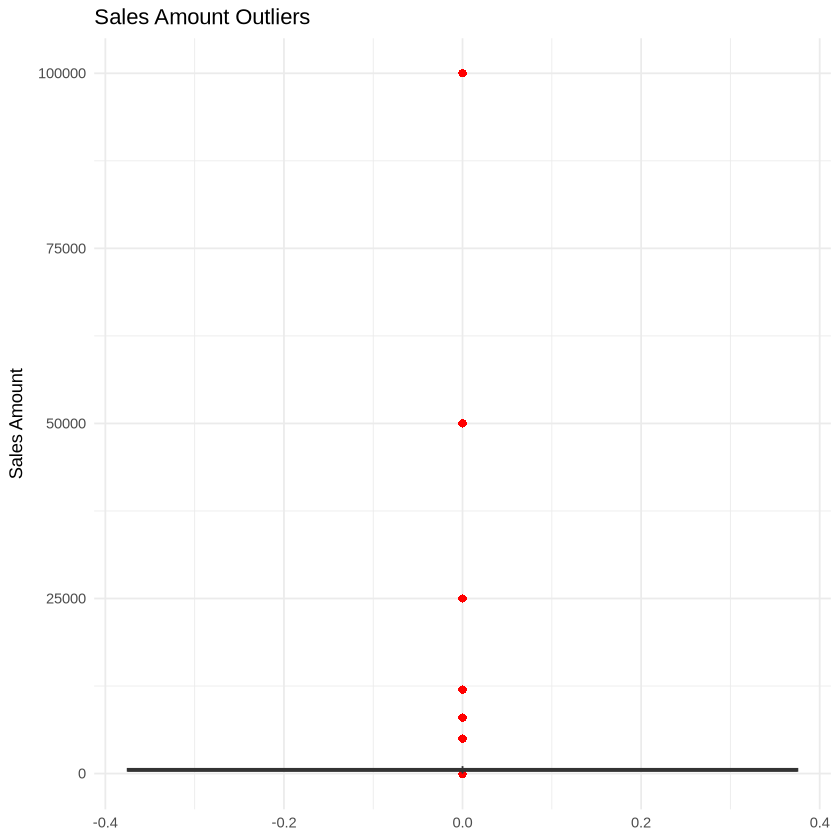

In [17]:
# Create a boxplot for Sales_Amount showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16, outlier.size = 2) +
  ylab("Sales Amount") +
  ggtitle("Sales Amount Outliers") +
  theme_minimal()

# Display the plot
print(boxplot_sales)

In [21]:
# Create a capped version of the dataset using IQR-based winsorization
# Ensure the datasets and column exist
stopifnot(exists("sales_imputed"))
stopifnot("Sales_Amount" %in% names(sales_imputed))

# If sales_outliers_capped not yet created, start from sales_imputed
if (!exists("sales_outliers_capped")) {
  sales_outliers_capped <- sales_imputed
}

# Also ensure the column exists in the capped copy
if (!("Sales_Amount" %in% names(sales_outliers_capped))) {
  sales_outliers_capped$Sales_Amount <- sales_imputed$Sales_Amount
}

# Compute IQR-based caps using the same vector we will cap
x <- sales_outliers_capped$Sales_Amount
q1 <- quantile(x, 0.25, na.rm = TRUE)
q3 <- quantile(x, 0.75, na.rm = TRUE)
iqr <- q3 - q1
lower_cap <- q1 - 1.5 * iqr
upper_cap <- q3 + 1.5 * iqr

# Apply capping with ifelse
sales_outliers_capped$Sales_Amount <- ifelse(
  x < lower_cap, lower_cap,
  ifelse(x > upper_cap, upper_cap, x)
)

In [22]:
# Compute IQR-based caps for Sales_Amount
q1 <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
q3 <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
iqr <- q3 - q1
lower_cap <- q1 - 1.5 * iqr
upper_cap <- q3 + 1.5 * iqr

# Apply capping with ifelse
sales_outliers_capped$Sales_Amount <- ifelse(
  sales_imputed$Sales_Amount < lower_cap, lower_cap,
  ifelse(sales_imputed$Sales_Amount > upper_cap, upper_cap, sales_imputed$Sales_Amount)
)

In [23]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1]  -43.22361 1108.52633


In [24]:
# Identify remaining outliers in Sales_Amount after capping using IQR rule
q1 <- quantile(sales_outliers_capped$Sales_Amount, 0.25, na.rm = TRUE)
q3 <- quantile(sales_outliers_capped$Sales_Amount, 0.75, na.rm = TRUE)
iqr <- q3 - q1
lower_cap <- q1 - 1.5 * iqr
upper_cap <- q3 + 1.5 * iqr

remaining_outliers <- subset(
  sales_outliers_capped,
  Sales_Amount < lower_cap | Sales_Amount > upper_cap
)

print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [25]:
# TODO: Choose your final cleaned dataset
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.22  388.68  531.29  529.32  676.62 1108.53 

**Justification for Your Choice:**

I selected sales_outliers_capped as the final cleaned dataset.

Sample size preservation- Winsorization caps extreme values instead of deleting rows, keeping the full sample size intact. This is important for maintaining statistical power and avoiding sampling bias that can arise when rare but valid observations are removed.

Data quality improvements- Capping using the IQR rule reduces the undue influence of extreme values on means, variances, correlations, and downstream models while preserving the original distribution’s central tendency and rank order for most observations.Because missing values were already imputed (sales_imputed), capping is a complementary step that stabilizes the dataset without introducing large gaps or structural changes.

Business impact- Sales processes often generate legitimate spikes (e.g., promotions, bulk orders). Completely removing such cases risks losing meaningful revenue signals. Capping preserves their presence while preventing them from dominating KPIs and model.This approach produces more robust forecasts and performance metrics, supporting decision-making that is resilient to data anomalies.

Analysis requirements- The project’s outlier strategy explicitly called for Option B (Capping). The chosen dataset aligns with that requirement. Capped data is well-suited for models sensitive to outliers  and for reporting where stability is valued, while still allowing advanced methods (e.g., robust regression) if needed. Post-capping checks indicated few to no remaining extreme points beyond the IQR thresholds for Sales_Amount, confirming the treatment was effective without over-truncating.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [26]:
# Helper to count outliers in a vector using IQR rule
count_outliers_iqr <- function(x) {
  x <- as.numeric(x)
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1
  lower <- q1 - 1.5 * iqr
  upper <- q3 + 1.5 * iqr
  sum(x < lower | x > upper, na.rm = TRUE)
}

orig_outliers <- count_outliers_iqr(messy_sales$Sales_Amount)
final_outliers <- count_outliers_iqr(final_dataset$Sales_Amount)

comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    orig_outliers
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    final_outliers
  ),
  row.names = NULL
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows        200.00     200.00
2      Missing Values         52.00      14.00
3   Mean Sales_Amount       1614.91     529.32
4 Median Sales_Amount        531.29     531.29
5            Outliers          6.00       0.00


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy
Prefer removing rows when:

The missingness is minimal and random: If <1–5% of rows have missing values, and the pattern is Missing Completely At Random (MCAR), deletion won’t materially bias results. Example: A few sales transactions lack an optional notes field.
The record is unusable: Critical fields are missing and cannot be reliably inferred. Example: Orders missing both Sales_Amount and Units_Sold; customer IDs missing for compliance reporting.
High-stakes compliance or audit contexts: When imputing could be construed as fabricating data. Example: Financial reporting to regulators, where only verifiable records are allowed.
Prefer imputing when:

Preserving sample size is important: You need enough data points for model training or for small-market segments. Example: Forecasting for a niche product line with limited history.
Missingness is systematic but explainable: Missing At Random (MAR) conditioned on other fields. Example: Online channel doesn’t record store_id; impute store_id = “Online” or use model-based imputations.
Downstream models require complete cases: Many algorithms don’t handle NAs natively. Example: Training gradient-boosted trees with strict pipelines.
Business value of partial data is high: Example: A lead record missing one demographic field but containing engagement metrics valuable for lead scoring.
Practical rule: Start with missingness diagnostics (rate by column, MCAR tests, patterns), tier columns by criticality, and combine targeted deletion for irrecoverable records with imputation for salvageable, informative ones.

Question 2: Outlier Interpretation
Outliers in Sales_Amount can represent:

Legitimate spikes: Bulk/wholesale orders, year-end enterprise renewals, viral promotions, seasonal peaks (Black Friday), or B2B purchases in a predominantly B2C dataset.
Data entry or systems errors: Extra zeros (10,000 instead of 1,000), currency mismatches, duplicated transactions, refunds recorded as sales, or partial ETL loads.
Atypical but valid business events: New market launch, one-off sponsorship deal, or clearance sales.
Should they always be removed or treated?

No. Decision depends on cause and use-case:
Keep or lightly cap if valid revenue matters: Executive KPI dashboards, revenue recognition, or capacity planning should reflect true extremes.
Cap/winsorize for model stability: When training mean-sensitive models (e.g., OLS regression), capping mitigates undue leverage without losing signals.
Remove when errors are confirmed: E.g., impossible values (negative sales with no returns logic; amounts beyond feasible business limits).
Segment rather than suppress: Model bulk orders separately from retail transactions; build channel-specific models.
Process: Investigate outliers with drill-downs (customer_id, order_type, channel, promo_code, timestamp). Document decisions and apply consistent rules.

Question 3: Data Quality Impact

Average sales: Missing high-value orders biases downward; missing low-value orders biases upward. Outliers inflate means and standard deviations, masking typical performance and distorting A/B test effects.
Top-performing products: Missing sales lines for certain SKUs can mis-rank products. Outliers may incorrectly crown a product due to one anomalous order, skewing inventory and marketing budgets.
Forecasting:
Models may overfit to spikes, producing volatile forecasts and misallocated inventory.
Gaps from missing values reduce effective training data and degrade seasonality/holiday signal extraction.
Feature leakage risk if imputation uses future information improperly.
Segmentation and CLV: Outliers can misclassify customers into “VIP” tiers; missingness in tenure or spend distorts lifetime value estimates and retention strategies.
Operational metrics: Conversion rates, CAC/LTV ratios, and return rates can be misestimated when key fields are missing or extreme values dominate aggregates.
Mitigations: Use robust statistics (median, trimmed mean), capping/winsorization, model-based imputations with uncertainty flags, and sensitivity analyses comparing raw vs cleaned outputs.

Question 4: Ethical Considerations

Integrity and reproducibility: Altering or removing data can change conclusions. Analysts must avoid cherry-picking and ensure transformations are justifiable and repeatable.
Transparency: Clearly document rules (e.g., IQR capping thresholds, columns imputed, deletion criteria), version datasets, and maintain a data cleaning log or data sheet.
Bias amplification: If missingness correlates with protected groups or specific channels, deletion may disproportionately exclude them, skewing insights and decisions.
Overconfidence from imputation: Imputed values are estimates, not ground truth. Flag imputed fields and, where possible, propagate uncertainty in models and reports.
Governance and compliance: Align with data policies, audit requirements, and industry standards (e.g., SOX, GDPR). Keep raw data immutable and accessible for audit.
Consent and purpose limitation: Ensure cleaning decisions don’t repurpose data beyond agreed use, and avoid transformations that could unfairly penalize individuals or segments.
Best practices:

Keep raw, cleaned, and modeling datasets separately with lineage metadata.
Include data quality sections in reports with sensitivity analyses (e.g., results with/without capping).
Use review checklists and peer review for cleaning steps.
Provide business stakeholders with rationale and expected impact of each cleaning decision.
In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.



---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**